In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import date
from plotly import graph_objs as go

In [2]:
START = "2014-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

period = 1 * 365
def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

data = load_data('BBRI.JK')
data.tail()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
2473,2023-12-18,5575.0,5575.0,5500.0,5500.0,5500.0,102780900
2474,2023-12-19,5450.0,5550.0,5450.0,5550.0,5550.0,135207300
2475,2023-12-20,5700.0,5700.0,5550.0,5550.0,5550.0,138470900
2476,2023-12-21,5550.0,5600.0,5525.0,5575.0,5575.0,99049600
2477,2023-12-22,5650.0,5700.0,5600.0,5675.0,5675.0,109411300


In [3]:
data = data.reset_index()
data.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2014-01-02,1460.0,1470.0,1440.0,1460.0,1065.586914,122627500
1,1,2014-01-03,1450.0,1460.0,1430.0,1450.0,1058.288452,102682500
2,2,2014-01-06,1440.0,1450.0,1400.0,1405.0,1025.445068,111960500
3,3,2014-01-07,1415.0,1425.0,1415.0,1415.0,1032.743530,88971500
4,4,2014-01-08,1420.0,1445.0,1420.0,1435.0,1047.340454,96254500


In [4]:
data = data.drop( ['Date', 'Adj Close'], axis=1)
data.head()

,index,Open,High,Low,Close,Volume
0,0,1460.0,1470.0,1440.0,1460.0,122627500
1,1,1450.0,1460.0,1430.0,1450.0,102682500
2,2,1440.0,1450.0,1400.0,1405.0,111960500
3,3,1415.0,1425.0,1415.0,1415.0,88971500
4,4,1420.0,1445.0,1420.0,1435.0,96254500


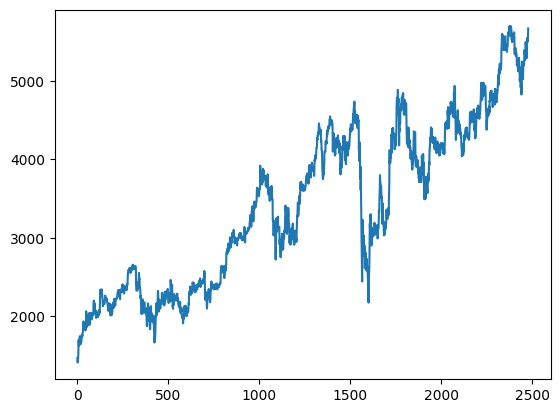

In [5]:
plt.plot(data.Close)

In [6]:
data

,index,Open,High,Low,Close,Volume
0,0,1460.0,1470.0,1440.0,1460.0,122627500
1,1,1450.0,1460.0,1430.0,1450.0,102682500
2,2,1440.0,1450.0,1400.0,1405.0,111960500
3,3,1415.0,1425.0,1415.0,1415.0,88971500
4,4,1420.0,1445.0,1420.0,1435.0,96254500
...,...,...,...,...,...,...
2473,2473,5575.0,5575.0,5500.0,5500.0,102780900
2474,2474,5450.0,5550.0,5450.0,5550.0,135207300
2475,2475,5700.0,5700.0,5550.0,5550.0,138470900
2476,2476,5550.0,5600.0,5525.0,5575.0,99049600


In [7]:
ma100 = data.Close.rolling(100).mean()
ma100

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
2473    5352.60
2474    5351.10
2475    5350.10
2476    5348.85
2477    5348.60
Name: Close, Length: 2478, dtype: float64

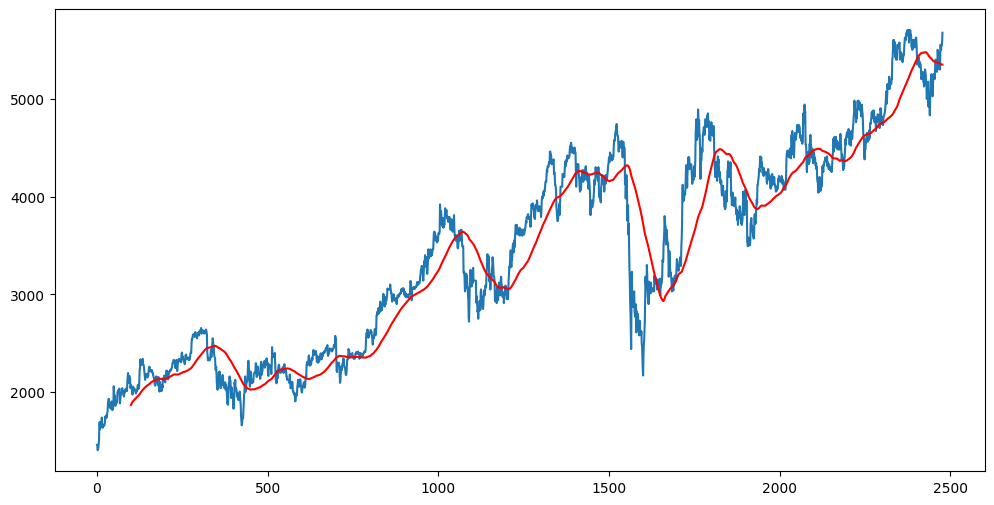

In [8]:
plt.figure(figsize=(12,6))
plt.plot(data.Close)
plt.plot(ma100, 'r')

In [9]:
ma200 = data.Close.rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2473    5261.975
2474    5265.375
2475    5268.725
2476    5272.200
2477    5276.475
Name: Close, Length: 2478, dtype: float64

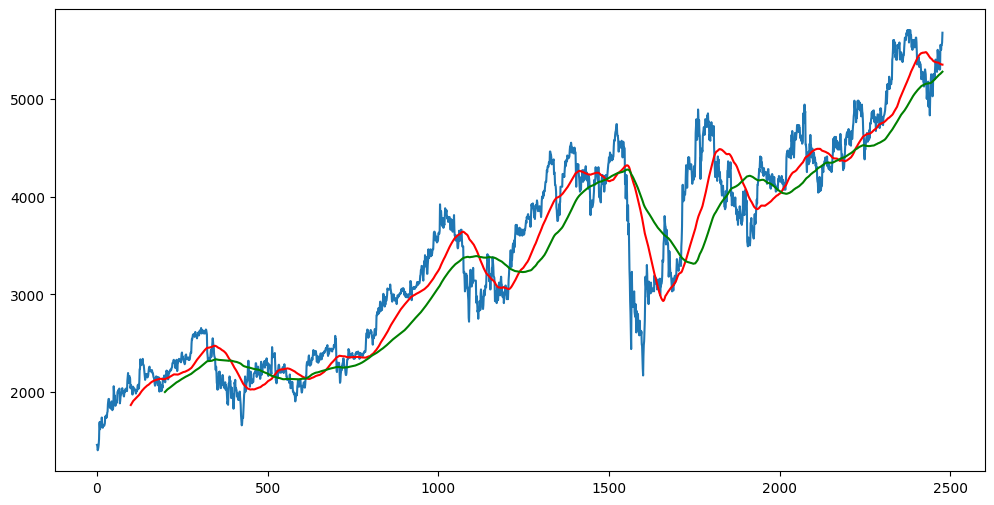

In [10]:
plt.figure(figsize=(12,6))
plt.plot(data.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [11]:
data.shape

(2478, 6)

In [12]:
#Split data into training and testing

data_training = pd.DataFrame(data['Close'][0:int(len(data)*0.70)])
data_testing = pd.DataFrame(data['Close'][int(len(data)*0.70): int(len(data))])

print(data_training.shape)
print(data_testing.shape)

(1734, 1)
(744, 1)


In [13]:
data_training.head()

,Close
0,1460.0
1,1450.0
2,1405.0
3,1415.0
4,1435.0


In [14]:
data_testing.head()

,Close
1734,4400.0
1735,4400.0
1736,4330.0
1737,4280.0
1738,4280.0


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01649175],
       [0.01349325],
       [0.        ],
       ...,
       [0.86806597],
       [0.89805097],
       [0.86806597]])

In [17]:
data_training_array.shape

(1734, 1)

In [18]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i, :])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [19]:
x_train.shape

(1634, 100, 1)

In [20]:
#MODEL
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [21]:
model = Sequential()
model.add(LSTM(units= 50 ,activation= 'relu', return_sequences= True,
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0, 2))

model.add(LSTM(units= 60 ,activation= 'relu', return_sequences= True))
model.add(Dropout(0, 3))

model.add(LSTM(units= 80 ,activation= 'relu', return_sequences= True))
model.add(Dropout(0, 4))

model.add(LSTM(units= 120 ,activation= 'relu'))
model.add(Dropout(0, 5))

model.add(Dense(units=1))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [23]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs= 50)

Epoch 1/50
52/52 [==============================] - 13s 180ms/step - loss: 0.0673
Epoch 2/50
52/52 [==============================] - 9s 177ms/step - loss: 0.0063
Epoch 3/50
52/52 [==============================] - 9s 174ms/step - loss: 0.0054
Epoch 4/50
52/52 [==============================] - 10s 196ms/step - loss: 0.0041
Epoch 5/50
52/52 [==============================] - 10s 189ms/step - loss: 0.0036
Epoch 6/50
52/52 [==============================] - 10s 183ms/step - loss: 0.0036
Epoch 7/50
52/52 [==============================] - 10s 196ms/step - loss: 0.0028
Epoch 8/50
52/52 [==============================] - 15s 299ms/step - loss: 0.0029
Epoch 9/50
52/52 [==============================] - 25s 472ms/step - loss: 0.0028
Epoch 10/50
52/52 [==============================] - 29s 562ms/step - loss: 0.0025
Epoch 11/50
52/52 [==============================] - 30s 575ms/step - loss: 0.0029
Epoch 12/50
52/52 [==============================] - 29s 564ms/step - loss: 0.0026
Epoch 13/50
52/

In [24]:
model.save('keras_model.h5')

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
data_testing.head()

,Close
1734,4400.0
1735,4400.0
1736,4330.0
1737,4280.0
1738,4280.0


In [26]:
data_training.tail(100)

,Close
1634,3140.0
1635,3110.0
1636,3160.0
1637,3170.0
1638,3130.0
...,...
1729,4090.0
1730,4240.0
1731,4300.0
1732,4400.0


In [27]:
past_100_days = data_training.tail(100)

In [28]:
final_df = past_100_days.append(data_testing, ignore_index=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_29032\531349220.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [29]:
final_df.head()

,Close
0,3140.0
1,3110.0
2,3160.0
3,3170.0
4,3130.0


In [30]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.05535055],
       [0.04428044],
       [0.06273063],
       [0.06642066],
       [0.05166052],
       [0.05535055],
       [0.04059041],
       [0.02214022],
       [0.05904059],
       [0.04059041],
       [0.05535055],
       [0.03690037],
       [0.05904059],
       [0.05535055],
       [0.04797048],
       [0.06273063],
       [0.        ],
       [0.03321033],
       [0.03321033],
       [0.04428044],
       [0.04428044],
       [0.05166052],
       [0.07380074],
       [0.13284133],
       [0.12546125],
       [0.12915129],
       [0.19557196],
       [0.2103321 ],
       [0.2398524 ],
       [0.29889299],
       [0.27675277],
       [0.26199262],
       [0.25830258],
       [0.19188192],
       [0.22878229],
       [0.24723247],
       [0.21771218],
       [0.20664207],
       [0.19188192],
       [0.19557196],
       [0.15498155],
       [0.0701107 ],
       [0.09594096],
       [0.16605166],
       [0.12546125],
       [0.099631  ],
       [0.07749077],
       [0.084

In [31]:
input_data.shape

(844, 1)

In [32]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i, :])
    y_test.append(input_data[i, 0])

In [33]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(744, 100, 1)
(744,)


In [34]:
# prediction

y_predicted = model.predict(x_test)

y_predicted.shape

24/24 [==============================] - 2s 48ms/step


(744, 1)

In [35]:
y_test

array([0.5202952 , 0.5202952 , 0.49446494, 0.47601476, 0.47601476,
       0.47601476, 0.49077491, 0.49446494, 0.47601476, 0.4501845 ,
       0.42066421, 0.43173432, 0.46494465, 0.43911439, 0.43542435,
       0.48708487, 0.47232472, 0.44649446, 0.47601476, 0.51660517,
       0.61254613, 0.63837638, 0.66420664, 0.65682657, 0.58671587,
       0.60147601, 0.60147601, 0.70110701, 0.66420664, 0.63837638,
       0.66051661, 0.61254613, 0.60147601, 0.54612546, 0.43911439,
       0.5202952 , 0.50553506, 0.51291513, 0.55350554, 0.54612546,
       0.54243542, 0.60147601, 0.61254613, 0.62361624, 0.63468635,
       0.6199262 , 0.60516605, 0.6199262 , 0.66420664, 0.66420664,
       0.66420664, 0.64206642, 0.64206642, 0.63468635, 0.67896679,
       0.66789668, 0.68634686, 0.65313653, 0.65682657, 0.64206642,
       0.58671587, 0.60516605, 0.58671587, 0.58302583, 0.63837638,
       0.6199262 , 0.65313653, 0.6199262 , 0.60516605, 0.6199262 ,
       0.6199262 , 0.60147601, 0.63837638, 0.63837638, 0.55719

In [36]:
y_predicted

array([[0.47519392],
       [0.4887665 ],
       [0.5031902 ],
       [0.5125072 ],
       [0.5123554 ],
       [0.50460565],
       [0.49425918],
       [0.48751637],
       [0.48687458],
       [0.48879036],
       [0.48729998],
       [0.477956  ],
       [0.46464038],
       [0.4560113 ],
       [0.45206577],
       [0.4508204 ],
       [0.45603406],
       [0.4651404 ],
       [0.47155708],
       [0.4756651 ],
       [0.48272485],
       [0.50408775],
       [0.5408988 ],
       [0.5877934 ],
       [0.63186556],
       [0.6501675 ],
       [0.6421042 ],
       [0.62155807],
       [0.6187495 ],
       [0.63431334],
       [0.65325737],
       [0.6680643 ],
       [0.6660497 ],
       [0.64857054],
       [0.61697596],
       [0.5665711 ],
       [0.5257202 ],
       [0.505181  ],
       [0.50387263],
       [0.5189116 ],
       [0.5403652 ],
       [0.5574979 ],
       [0.57391226],
       [0.5911631 ],
       [0.60839176],
       [0.6238551 ],
       [0.6319226 ],
       [0.628

In [37]:
scaler.scale_

array([0.000369])

In [38]:
sclae_factor = 1/0.000369
y_predicted = y_predicted * sclae_factor
y_test = y_test * sclae_factor

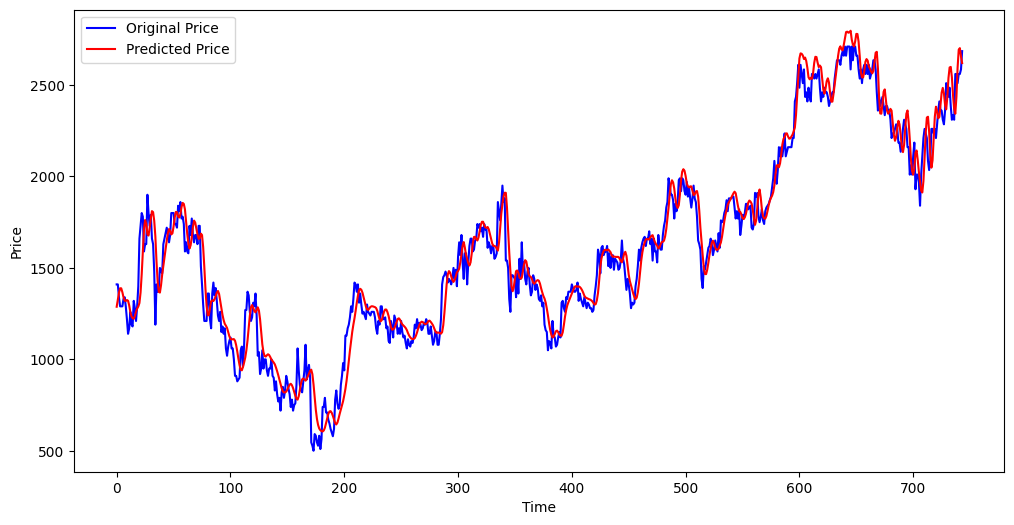

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()